# Rede Neural (análise de sentimento de imagens da página do Facebook)

In [33]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from pathlib import Path
from google.colab import drive

In [34]:
# Carregue o modelo MobileNetV2 pré-treinado (sem as camadas densas no topo)
# O MobileNetV2 é uma rede neural pré-treinada que foi treinada em um grande conjunto de dados chamado ImageNet, que contém milhões de imagens de várias categorias diferentes.
# weights='imagenet': carregar os pesos pré-treinados da versão do MobileNetV2 que foi treinada no conjunto de dados ImageNet
# include_top=False: excluindo a camada de classificação final (top) da rede. Essa camada de classificação normalmente consiste em uma camada densa (fully connected)
# que produz saídas para cada classe no conjunto de dados original do ImageNet. Excluindo essa camada, você está preparando o modelo para personalizar a camada de classificação para uma nova tarefa.

base_model = MobileNetV2(weights='imagenet', include_top=False)

x = base_model.output # modelo base MobileNetV2
x = GlobalAveragePooling2D()(x) # reduzir a dimensionalidade dos dados espaciais antes da camada de saída,
x = Dense(128, activation='relu')(x) # função de ativação relu (toggle de neurônios)
predictions = Dense(4, activation='softmax')(x) # 4 saídas (4 categorias de classe))

# Crie o modelo final
modelo = Model(inputs=base_model.input, outputs=predictions)

In [35]:
# Congelar todas as camadas pré-treinadas
for layer in base_model.layers:
    layer.trainable = False

In [36]:
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [38]:
pasta_imagens_treino = Path('/content/drive/My Drive/TechChallenge5/treino')
# filepaths = list(pasta_imagens.glob(r'**/*.png')) + list(pasta_imagens.glob(r'**/*.jpeg')) + list(pasta_imagens.glob(r'**/*.jpg'))
filepaths_treino = list(pasta_imagens_treino.glob(r'**/*.*'))
filepaths_treino

[PosixPath('/content/drive/My Drive/TechChallenge5/treino/feliz/1.png'),
 PosixPath('/content/drive/My Drive/TechChallenge5/treino/feliz/4.jpg'),
 PosixPath('/content/drive/My Drive/TechChallenge5/treino/feliz/5.jpeg'),
 PosixPath('/content/drive/My Drive/TechChallenge5/treino/feliz/6.jpg'),
 PosixPath('/content/drive/My Drive/TechChallenge5/treino/feliz/7.jpg'),
 PosixPath('/content/drive/My Drive/TechChallenge5/treino/feliz/8.jpg'),
 PosixPath('/content/drive/My Drive/TechChallenge5/treino/feliz/9.jpg'),
 PosixPath('/content/drive/My Drive/TechChallenge5/treino/feliz/2.jpg'),
 PosixPath('/content/drive/My Drive/TechChallenge5/treino/feliz/3.jpg'),
 PosixPath('/content/drive/My Drive/TechChallenge5/treino/feliz/10.jpg'),
 PosixPath('/content/drive/My Drive/TechChallenge5/treino/feliz/11.jpg'),
 PosixPath('/content/drive/My Drive/TechChallenge5/treino/feliz/12.jpeg'),
 PosixPath('/content/drive/My Drive/TechChallenge5/treino/feliz/13.jpg'),
 PosixPath('/content/drive/My Drive/TechChall

In [39]:
pasta_imagens_teste = Path('/content/drive/My Drive/TechChallenge5/teste')
# filepaths = list(pasta_imagens.glob(r'**/*.png')) + list(pasta_imagens.glob(r'**/*.jpeg')) + list(pasta_imagens.glob(r'**/*.jpg'))
filepaths_teste = list(pasta_imagens_teste.glob(r'**/*.*'))
filepaths_teste

[PosixPath('/content/drive/My Drive/TechChallenge5/teste/feliz/1.png'),
 PosixPath('/content/drive/My Drive/TechChallenge5/teste/feliz/2.jpg'),
 PosixPath('/content/drive/My Drive/TechChallenge5/teste/feliz/3.jpg'),
 PosixPath('/content/drive/My Drive/TechChallenge5/teste/neutro/1.png'),
 PosixPath('/content/drive/My Drive/TechChallenge5/teste/neutro/2.jpg'),
 PosixPath('/content/drive/My Drive/TechChallenge5/teste/triste/1.jpg'),
 PosixPath('/content/drive/My Drive/TechChallenge5/teste/bravo/1.jpg')]

In [40]:
# Para evitar problemas de overfitting, usei o ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0/255, # Normaliza os valores de pixel para o intervalo de 0 a 1.
    rotation_range=20, # Aplica rotações aleatórias de até 20 graus nas imagens.
    width_shift_range=0.2, # Realiza deslocamentos aleatórios horizontal e vertical nas imagens.
    height_shift_range=0.2,
    shear_range=0.2, # corta as bordas
    zoom_range=0.2, # aplica zoom nas imagens
    horizontal_flip=True, # realiza viragens horizontais aleatórias nas imagens.
    fill_mode='nearest' # preenche os pixels que podem ser criados devido a transformações com os valores mais próximos.
)

# Cria a base de treinamento
train_generator = train_datagen.flow_from_directory(
    pasta_imagens_treino,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Treine o modelo
modelo.fit(
    train_generator,
    epochs=20,
)

Found 21 images belonging to 4 classes.
Epoch 1/20
1/1 [==============================] - 6s 6s/step - loss: 1.5117 - accuracy: 0.3333
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 1.1445 - accuracy: 0.6190
Epoch 3/20
1/1 [==============================] - 1s 1s/step - loss: 0.8052 - accuracy: 0.7143
Epoch 4/20
1/1 [==============================] - 1s 1s/step - loss: 0.4750 - accuracy: 0.8095
Epoch 5/20
1/1 [==============================] - 1s 1s/step - loss: 0.3961 - accuracy: 0.9524
Epoch 6/20
1/1 [==============================] - 1s 1s/step - loss: 0.2218 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 1s 1s/step - loss: 0.1487 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 1s 1s/step - loss: 0.2835 - accuracy: 0.9048
Epoch 9/20
1/1 [==============================] - 1s 1s/step - loss: 0.1347 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 2s 2s/step - loss: 0.0602 - accuracy: 1.0000
Epoch 11/

In [41]:
# chamando dados de teste
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    pasta_imagens_teste,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Avalie o modelo no conjunto de teste
test_loss, test_acc = modelo.evaluate(test_generator)
print(f'Acurácia no conjunto de teste: {test_acc}')


Found 7 images belonging to 4 classes.
1/1 [==============================] - 1s 1s/step - loss: 0.0075 - accuracy: 1.0000
Acurácia no conjunto de teste: 1.0


In [42]:
image_size = 64
categorias = ['feliz', 'neutro', 'triste', 'bravo']

#Função para adivinhar o animal
def cnn_predict(filepath):
    # Converte o caminho do arquivo para uma imagem
    image = cv2.imread(filepath)
    # Redimensione a imagem e normalize o intervalo de pixels para ficar entre 0 e 1
    img = cv2.resize(image, (image_size, image_size)).astype('float32') / 255.0
    # Expandir a forma do array de imagens
    img = np.expand_dims(img, axis=0)
    # Usando o modelo para prever o animal que representa a imagem
    pred = modelo.predict(img)
    # Definindo uma variável para armazenar o índice que representa o caractere que representa a imagem
    classes=np.argmax(pred, axis=1)
    # Print no nome do animal previsto
    print(categorias[classes[0]])
    # Plote a imagem do animal
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # Desliga o eixo de plotagem
    plt.axis('off')

1/1 [==============================] - 1s 864ms/step
neutro


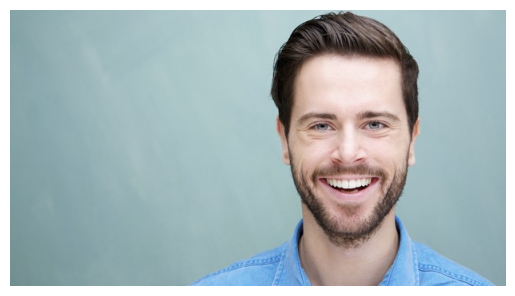

In [43]:
cnn_predict('/content/drive/My Drive/TechChallenge5/guessing/1.jpg')

1/1 [==============================] - 0s 29ms/step
neutro


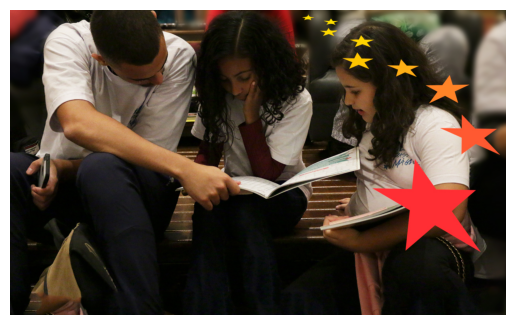

In [44]:
cnn_predict('/content/drive/My Drive/TechChallenge5/guessing/2.jpg')

1/1 [==============================] - 0s 27ms/step
neutro


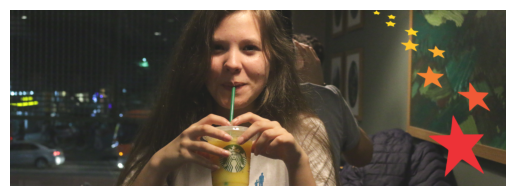

In [45]:
cnn_predict('/content/drive/My Drive/TechChallenge5/guessing/3.png')

1/1 [==============================] - 0s 43ms/step
neutro


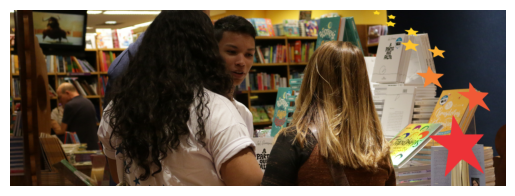

In [46]:
cnn_predict('/content/drive/My Drive/TechChallenge5/guessing/4.png')

1/1 [==============================] - 0s 27ms/step
neutro


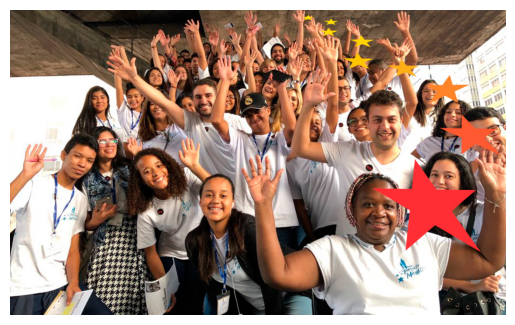

In [47]:
cnn_predict('/content/drive/My Drive/TechChallenge5/guessing/5.jpg')

1/1 [==============================] - 0s 28ms/step
neutro


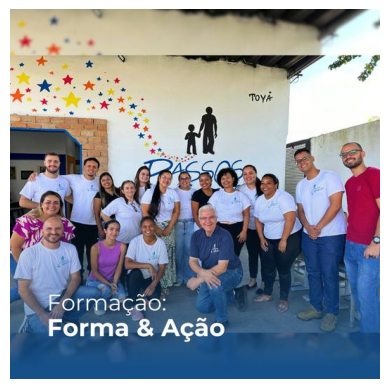

In [48]:
cnn_predict('/content/drive/My Drive/TechChallenge5/guessing/6.jpg')

1/1 [==============================] - 0s 26ms/step
neutro


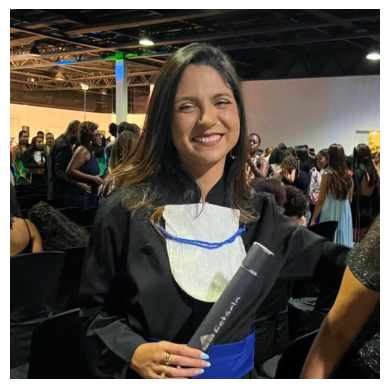

In [49]:
cnn_predict('/content/drive/My Drive/TechChallenge5/guessing/7.jpg')

1/1 [==============================] - 0s 27ms/step
neutro


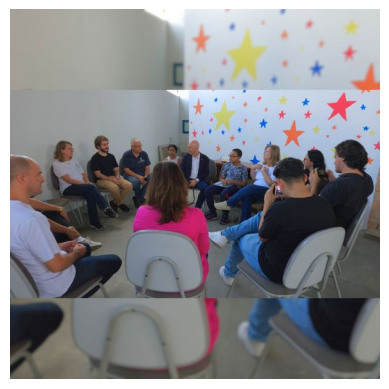

In [50]:
cnn_predict('/content/drive/My Drive/TechChallenge5/guessing/8.jpg')

1/1 [==============================] - 0s 28ms/step
neutro


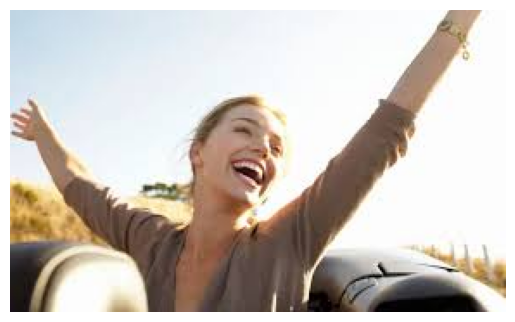

In [51]:
cnn_predict('/content/drive/My Drive/TechChallenge5/guessing/9.jpg')

1/1 [==============================] - 0s 27ms/step
feliz


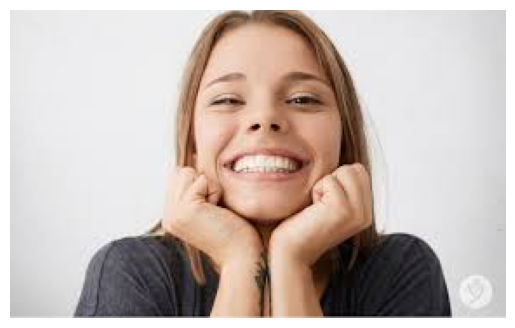

In [52]:
cnn_predict('/content/drive/My Drive/TechChallenge5/guessing/10.jpg')

## Exportando o modelo para uso no Streamlit

In [53]:
modelo.save('cnn')

## Importando o modelo para teste

In [54]:
modelo = load_model('cnn')

1/1 [==============================] - 2s 2s/step
feliz


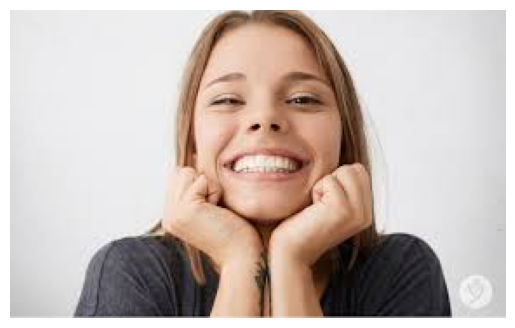

In [55]:
cnn_predict('/content/drive/My Drive/TechChallenge5/guessing/10.jpg')

1/1 [==============================] - 0s 149ms/step
neutro


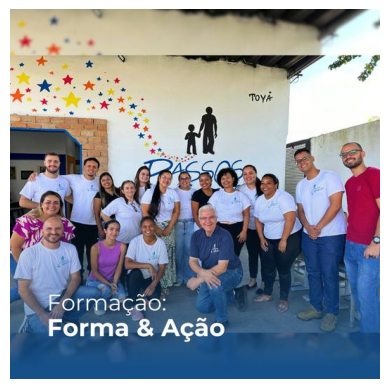

In [56]:
cnn_predict('/content/drive/My Drive/TechChallenge5/guessing/6.jpg')